In [1]:
import math
import itertools

import numpy as np
from numpy import random
from numpy.random import Generator, PCG64

import scipy.stats

from fractal_ml import generate_direction_fractal, approx_box_counting

import matplotlib.pyplot as plt

In [2]:
def convert_base(x, base=2, precision=1000):
    x = x - int(x)
    exponents = range(-1, (-precision - 1) * 2, -1)
    for e in exponents:
        d = int(x // (base ** e))
        x -= d * (base ** e)
        yield d
        if x == 0: break

In [3]:
def cantor_sample(precision=100):
    # Uses the bijection between [0, 1] and the Cantor set that takes x in [0, 1] in binary form, replaces the 1's with 2's
    # and reinterprets it as a ternary number.
    x = random.rand()
    base = convert_base(x, 2, precision)
    
    #converts the binary form to ternary and evaluates it as a real number.
    val = sum(2*d * (3 ** (-i - 1)) for i, d in enumerate(convert_base(x)))
    return val

In [4]:
def sierpinski_sample(precision=100):
    # Takes a random number in [0, 1] and uses it to navigate the Left/Top/Right tree.
    x = random.rand()
    s_x, s_y = 0, 0
    path = convert_base(x, 3, precision)
    exp = 1
    for p in path:
        exp -= 1
        if p == 0:
            pass
        elif p == 1:
            s_x += 0.25 * 2 ** exp
            s_y += 0.5 * 2 ** exp
        elif p == 2:
            s_x += 0.5 * 2 ** exp
    return s_x, s_y

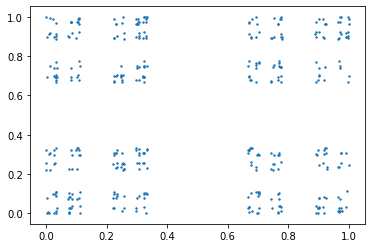

In [5]:
data = np.array([(cantor_sample(), cantor_sample()) for _ in range(400)])
x, y = data.T
plt.scatter(x, y, s=2)
plt.show()

In [6]:
def fractal_dim(base, exp_low, exp_high, data):
    counts = approx_box_counting(base, exp_low, exp_high, data)
    data = np.array([[(exp_low + i), np.log(counts[i])/np.log(base)] for i in range(len(counts))])
    return data

True dim:  1.2618595071429148
y =  -1.4643856189774727 x +  0.7695993813109903
0.9928496911289774 0.0002571640454747591


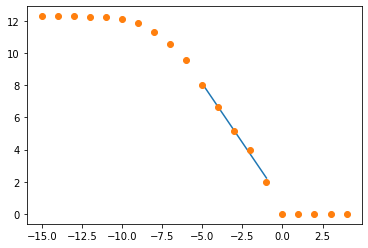

In [13]:
base = 2
data = np.array([(cantor_sample(), cantor_sample()) for _ in range(5000)])
counts = fractal_dim(base, -5, 0, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, m*x+b)

counts = fractal_dim(base, -15, 5, data)
x, y = counts[:,0], counts[:,1]
plt.plot(x, y, 'o')

print("True dim: ", np.log(4)/np.log(3))
print("y = ", m, "x + ", b)
print(r_value**2, p_value)

True dim:  1.5849625007211563
y =  -1.584962500721156 x +  0.4150374992788448
1.0 1.2004217548761408e-30


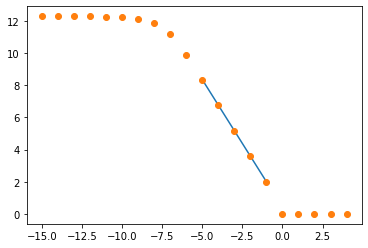

In [8]:
base = 2
data = np.array([sierpinski_sample() for _ in range(5000)])
counts = fractal_dim(base, -5, 0, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, m*x+b)

counts = fractal_dim(base, -15, 5, data)
x, y = counts[:,0], counts[:,1]
plt.plot(x, y, 'o')

print("True dim: ", np.log(3)/np.log(2))
print("y = ", m, "x + ", b)
print(r_value**2, p_value)

(100, 3, 2)


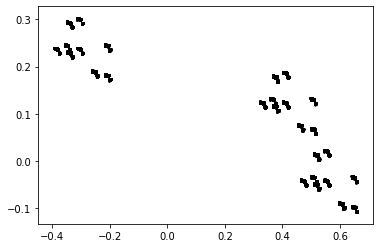

In [9]:
def random_direction_matrix(number_of_directions, extrinsic_dim, precision=1000):
    mean = np.zeros([extrinsic_dim])
    cov = np.identity(extrinsic_dim)
    rg = np.random.Generator(PCG64())
    # We can normalize this if we want to
    base = rg.multivariate_normal(mean,cov,[precision,number_of_directions])
    return base

directions = random_direction_matrix(3, 2, 100)
print(directions.shape)
data = generate_direction_fractal(10000, 0.3, directions)
x, y = np.array(data).T
plt.scatter(x, y, s=2, c='black')
plt.show()

y =  -0.8740755447673509 x +  1.2072322005543654
0.9979734902531495 4.615356012883944e-12


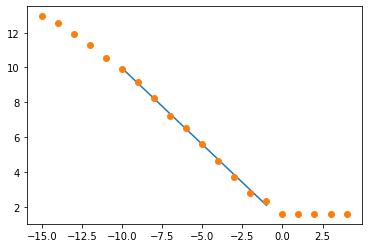

In [10]:
base = 2
counts = fractal_dim(base, -10, 0, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, m*x+b)

counts = fractal_dim(base, -15, 5, data)
x, y = counts[:,0], counts[:,1]
plt.plot(x, y, 'o')

print("y = ", m, "x + ", b)
print(r_value**2, p_value)

y =  -0.8647143177002076 x +  0.7455242702972749
0.9969454732926453 3.502368553230363e-06


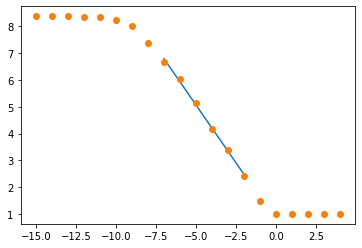

In [11]:
base = 3
counts = fractal_dim(base, -7, -1, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, m*x+b)

counts = fractal_dim(base, -15, 5, data)
x, y = counts[:,0], counts[:,1]
plt.plot(x, y, 'o')

print("y = ", m, "x + ", b)
print(r_value**2, p_value)

y =  -0.8554237207441386 x +  0.6222552414538747
0.9973664007373443 2.603228571557229e-06


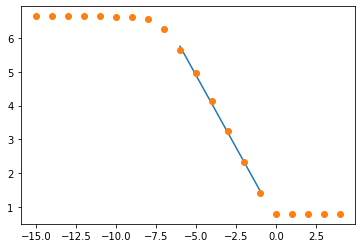

In [12]:
base = 4
counts = fractal_dim(base, -6, 0, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, m*x+b)

counts = fractal_dim(base, -15, 5, data)
x, y = counts[:,0], counts[:,1]
plt.plot(x, y, 'o')

print("y = ", m, "x + ", b)
print(r_value**2, p_value)